<center><h1>WEBSCRAPE EBAY PRODUCT DATA</h1></center>

In [61]:
# Import all libraries required

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [62]:
# Specify the URL of the Ebay item

url_pattern = 'https://www.ebay.com/sch/267/i.html?_from=R40&_nkw=Business+Intelligence+&rt=nc'

In [63]:
# create an empty list to store the scraped data
product_data = []

# iterate over the page numbers
for page_num in range(1, 11):   # scrape data from page 1 to 10
    # create the url for the current page
    url = url_pattern.format(page_num=page_num)

In [64]:
#send a GET request to the URL and extract the HTML content

response = requests.get(url)
content = response.content

In [65]:
#Use Beautiful Soup to parse the HTML content

soup = BeautifulSoup(content, 'html.parser')

In [66]:
items = soup.find_all('div', {'class': 's-item__wrapper clearfix'})

for item in items:
    title = item.find('div', {'class': 's-item__title'}).text.strip()
    
    price_sold = float(item.find('span', {'class': 's-item__price'}).text.replace('$','').replace(',','').strip())
    shipping_cost = item.find('span', {'class': 's-item__shipping s-item__logisticsCost'})
    if shipping_cost:
        shipping_cost = shipping_cost.text.replace('+','').replace('$','').replace(',','').strip()
    else:
        shipping_cost = 0.0
    item_seller = item.find('span', {'class':'s-item__seller-info'})
    if item_seller:
        item_seller = item_seller.text.strip()
    else:
        item_seller = ''
    link = item.find('a', {'class': 's-item__link'})['href']
    product_data.append([title, price_sold, shipping_cost, item_seller, link])
    
BIbooks = pd.DataFrame(product_data, columns=['Title', 'Price_sold', 'Shipping_cost','Item_seller', 'Link'])
print(BIbooks.head())


                                               Title  Price_sold  \
0                                       Shop on eBay       20.00   
1  Business Intelligence Roadmap: The Complete Pr...        5.75   
2  Data Mining for Business Intelligence: Concept...       38.07   
3  Business Intelligence, Analytics, and Data Sci...       23.50   
4  The Intelligent Asset Allocator: How to Build ...        4.63   

   Shipping_cost                      Item_seller  \
0            0.0                                    
1  Free shipping     thrift.books (3,540,506) 99%   
2  Free shipping      second.sale (3,210,382) 98%   
3  Free shipping  dunkin_bookstore (33,748) 98.9%   
4  Free shipping      second.sale (3,210,382) 98%   

                                                Link  
0  https://ebay.com/itm/123456?hash=item28caef0a3...  
1  https://www.ebay.com/itm/193839561169?epid=230...  
2  https://www.ebay.com/itm/265778437135?epid=234...  
3  https://www.ebay.com/itm/233198562933?epid=234...

In [67]:
#Display the first 5 rows of the Business Inteligence(BI) books

BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link
0,Shop on eBay,20.00,0.0,,https://ebay.com/itm/123456?hash=item28caef0a3...
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...


In [68]:
#To separate the Item_seller column into two columns, one for the seller name and one for the seller rating

BIbooks[['Seller_name','Seller_feedback', 'Seller_Rating%']] = BIbooks['Item_seller'].str.split(' ', expand=True)
BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
0,Shop on eBay,20.00,0.0,,https://ebay.com/itm/123456?hash=item28caef0a3...,,None,None
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,"(3,540,506)",99%
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,"(3,210,382)",98%
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,"(33,748)",98.9%
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,"(3,210,382)",98%


In [69]:
#check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    1
Seller_Rating%     1
dtype: int64

In [70]:

#Drop the first row column 

BIbooks = BIbooks.drop([0], axis=0) #drop the first row

BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,"(3,540,506)",99%
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,"(3,210,382)",98%
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,"(33,748)",98.9%
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,"(3,210,382)",98%
5,Mastering Tableau: Smart Business Intelligence...,0.99,3.50 shipping,tigers_redwings (109) 100%,https://www.ebay.com/itm/126364706666?epid=234...,tigers_redwings,(109),100%


In [71]:
#Remove the brackets from the 'Seller_feedback' column by calling the str.replace() 
BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].str.replace('[(),]', '', regex=True)


#Remove the Percentage % sign from the 'Seller_Rating%' column
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].str.replace('%', '', regex=True)


#Convert the column datatype using the astype()

BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].astype(int)
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].astype(float)
BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,3540506,99.0
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,3210382,98.0
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,33748,98.9
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,3210382,98.0
5,Mastering Tableau: Smart Business Intelligence...,0.99,3.50 shipping,tigers_redwings (109) 100%,https://www.ebay.com/itm/126364706666?epid=234...,tigers_redwings,109,100.0


In [72]:
#Check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    0
Seller_Rating%     0
dtype: int64

In [73]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 1 to 73
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            73 non-null     object 
 1   Price_sold       73 non-null     float64
 2   Shipping_cost    73 non-null     object 
 3   Item_seller      73 non-null     object 
 4   Link             73 non-null     object 
 5   Seller_name      73 non-null     object 
 6   Seller_feedback  73 non-null     int64  
 7   Seller_Rating%   73 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.7+ KB


In [74]:
BIbooks.head(30)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,3540506,99.0
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,3210382,98.0
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,33748,98.9
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,3210382,98.0
5,Mastering Tableau: Smart Business Intelligence...,0.99,3.50 shipping,tigers_redwings (109) 100%,https://www.ebay.com/itm/126364706666?epid=234...,tigers_redwings,109,100.0
6,"Business Intelligence, Analytics, and Data Sci...",14.50,5.61 shipping,mavy.a-22 (0) 0%,https://www.ebay.com/itm/145689118921?epid=234...,mavy.a-22,0,0.0
7,Business Intelligence Guidebook: From - Paperb...,26.69,Free shipping,"booksrun (73,601) 99.1%",https://www.ebay.com/itm/404823274696?epid=130...,booksrun,73601,99.1
8,"Business Intelligence, Analytics, A..., Ramesh...",13.00,3.50 shipping,keby_26 (282) 100%,https://www.ebay.com/itm/386790060198?epid=160...,keby_26,282,100.0
9,"Business Intelligence, Analytics, and Data Sci...",15.25,5.61 shipping,tel67not (230) 0%,https://www.ebay.com/itm/186333459344?epid=234...,tel67not,230,0.0
10,The Definitive Guide to DAX: Business intellig...,31.99,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,33748,98.9


In [75]:
#create new columns for shipping cost value and shipping type from 'Shipping_cost'column
BIbooks[['Shipping_cost_value', 'Shipping_type']] = BIbooks['Shipping_cost'].str.extract('([\d\.]+)\s*([a-zA-Z\s]+)', expand=True)

#show the updated dataframe
BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,3540506,99.0,NaN,NaN
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,3210382,98.0,NaN,NaN
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,33748,98.9,NaN,NaN
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,3210382,98.0,NaN,NaN
5,Mastering Tableau: Smart Business Intelligence...,0.99,3.50 shipping,tigers_redwings (109) 100%,https://www.ebay.com/itm/126364706666?epid=234...,tigers_redwings,109,100.0,3.50,shipping


In [76]:
#add "paid" in front of "shipping" in the Shipping_type column
BIbooks['Shipping_type'] = 'Paid ' + BIbooks['Shipping_type'].str.replace('shipping', 'shipping', regex=True)


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_type'] = BIbooks['Shipping_type'].fillna('Free International shipping')


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].fillna(0)


#Convert data type to float
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].astype(float)


BIbooks.head(5)

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,Business Intelligence Roadmap: The Complete Pr...,5.75,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/193839561169?epid=230...,thrift.books,3540506,99.0,0.0,Free International shipping
2,Data Mining for Business Intelligence: Concept...,38.07,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/265778437135?epid=234...,second.sale,3210382,98.0,0.0,Free International shipping
3,"Business Intelligence, Analytics, and Data Sci...",23.50,Free shipping,"dunkin_bookstore (33,748) 98.9%",https://www.ebay.com/itm/233198562933?epid=234...,dunkin_bookstore,33748,98.9,0.0,Free International shipping
4,The Intelligent Asset Allocator: How to Build ...,4.63,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/264696869416?epid=176...,second.sale,3210382,98.0,0.0,Free International shipping
5,Mastering Tableau: Smart Business Intelligence...,0.99,3.50 shipping,tigers_redwings (109) 100%,https://www.ebay.com/itm/126364706666?epid=234...,tigers_redwings,109,100.0,3.5,Paid shipping


In [77]:

BIbooks.iloc[40:46, :]

,Title,Price_sold,Shipping_cost,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
41,Data Mining for Business Intelligence: Concept...,5.33,Free shipping,"second.sale (3,210,382) 98%",https://www.ebay.com/itm/275385011055?epid=844...,second.sale,3210382,98.0,0.0,Free International shipping
42,Business Intelligence and Analytics : Systems ...,22.70,Free shipping,"betterworldbooks (2,597,925) 98.8%",https://www.ebay.com/itm/276344417105?epid=177...,betterworldbooks,2597925,98.8,0.0,Free International shipping
43,Value Investing: Tools and Techniques for Inte...,10.06,Free shipping,"goodwillsa (65,404) 99.3%",https://www.ebay.com/itm/276358954688?epid=741...,goodwillsa,65404,99.3,0.0,Free International shipping
44,"Analytics: Business Intelligence, - Paperback,...",8.10,Free shipping,"booksrun (73,601) 99.1%",https://www.ebay.com/itm/145641420391?epid=240...,booksrun,73601,99.1,0.0,Free International shipping
45,Applied Microsoft Analysis Services 2005: And ...,4.58,Free shipping,"thrift.books (3,540,506) 99%",https://www.ebay.com/itm/145046290785?epid=468...,thrift.books,3540506,99.0,0.0,Free International shipping
46,Business Intelligence Roadmap: The Complete Pr...,3.90,Free shipping,"gently.loved.books (97,813) 99.6%",https://www.ebay.com/itm/394510856363?epid=230...,gently.loved.books,97813,99.6,0.0,Free International shipping


In [78]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 1 to 73
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                73 non-null     object 
 1   Price_sold           73 non-null     float64
 2   Shipping_cost        73 non-null     object 
 3   Item_seller          73 non-null     object 
 4   Link                 73 non-null     object 
 5   Seller_name          73 non-null     object 
 6   Seller_feedback      73 non-null     int64  
 7   Seller_Rating%       73 non-null     float64
 8   Shipping_cost_value  73 non-null     float64
 9   Shipping_type        73 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 5.8+ KB


<h2>Data Analysis</h2>
What is the:
<ul>
    <li>Average price of books</li>
    <li>Average shipping cost</li>
    <li>Seller feedback and rating</li>
    <li>Shipping type</li>
    <li>Price vs. shipping cost</li>
    <li>Top sellers</li>
    <li>Price distribution by seller</li>
</ul>


In [79]:
BIbooks.describe()

,Price_sold,Seller_feedback,Seller_Rating%,Shipping_cost_value
count,73.000000,7.300000e+01,73.000000,73.000000
mean,13.230959,1.520379e+06,96.117808,0.910685
std,10.953738,1.578820e+06,16.263843,2.041380
min,0.990000,0.000000e+00,0.000000,0.000000
25%,5.480000,2.581800e+04,98.000000,0.000000
50%,9.200000,4.067500e+05,98.900000,0.000000
75%,15.340000,3.210382e+06,99.300000,0.000000
max,54.900000,3.540506e+06,100.000000,8.700000


<ul>
<li>The Average price of BIbooks on Ebay is 14.45</li>

<li>The Average shipping cost of BIbooks on Ebay is 0.89</li>

<li>The Minimum price of BIbooks on Ebay is 0.99</li>

<li>The minimum shipping cost of BIbooks on Ebay is 0</li>

<li>The Maximum price of of BIbooks on Ebay is 54.90</li>

<li>The Maximum shipping cost of BIbooks on Ebay is 8.70</li>
</ul>

In [80]:
BIbooks.nunique()

Title                  71
Price_sold             67
Shipping_cost           6
Item_seller            32
Link                   73
Seller_name            32
Seller_feedback        32
Seller_Rating%         16
Shipping_cost_value     6
Shipping_type           2
dtype: int64

In [93]:
import numpy as np

# Select only numeric columns for correlation computation
numeric_columns = BIbooks.select_dtypes(include=[np.number])

# Compute correlation
correlation_matrix = numeric_columns.corr()

# Print correlation matrix in tabular format
print(correlation_matrix)




                     Price_sold  Seller_feedback  Seller_Rating%  \
Price_sold             1.000000        -0.279684       -0.021091   
Seller_feedback       -0.279684         1.000000        0.134899   
Seller_Rating%        -0.021091         0.134899        1.000000   
Shipping_cost_value    0.202358        -0.435408       -0.363031   

                     Shipping_cost_value  
Price_sold                      0.202358  
Seller_feedback                -0.435408  
Seller_Rating%                 -0.363031  
Shipping_cost_value             1.000000  


In [ ]:
The correlation coefficient between Price_sold and Shipping_cost_value is  0.202358 , this indicates a weak positive correlation, which means that there is some tendency for books with higher prices to have higher shipping costs.

The correlation coefficient between Price_sold and Seller_feedback is  -0.279684, this indicates a negative correlation, the negative correlation coefficient suggests that as the seller feedback rating increases, the price of the book tends to decrease.

The correlation coefficient between Price_sold and Seller_Rating% is -0.034804, this indicates no significant correlation between them.

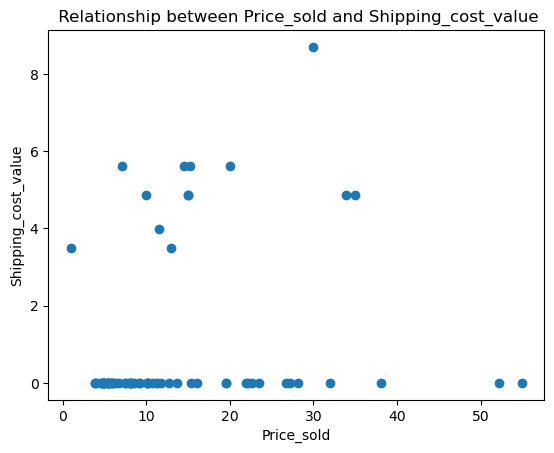

In [82]:
#Relationship between 'Price_sold' and 'Shipping_cost_value'

plt.scatter(x=BIbooks['Price_sold'], y=BIbooks['Shipping_cost_value'])

plt.title(' Relationship between Price_sold and Shipping_cost_value')
plt.xlabel('Price_sold')
plt.ylabel('Shipping_cost_value')


plt.show()

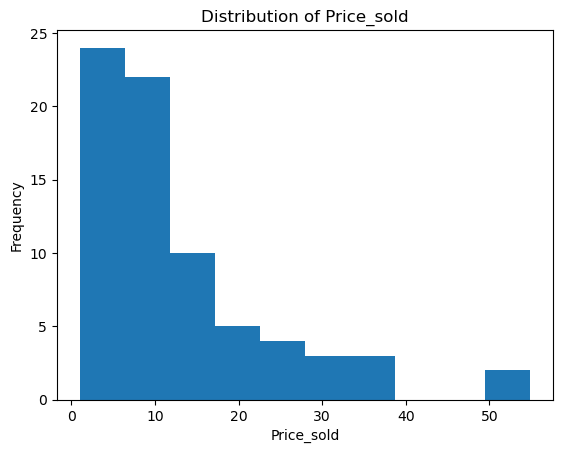

In [83]:
#distribution of Price_sold

plt.hist(BIbooks['Price_sold'], bins=10)

plt.title('Distribution of Price_sold')
plt.xlabel('Price_sold')
plt.ylabel('Frequency')
plt.show()

In [84]:
#Count of shipping type
BIbooks['Shipping_type'].value_counts()

Shipping_type
Free International shipping    60
Paid shipping                  13
Name: count, dtype: int64

In [85]:
# total shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].sum()

Shipping_type
Free International shipping     0.00
Paid shipping                  66.48
Name: Shipping_cost_value, dtype: float64

In [86]:
# max shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].max()

Shipping_type
Free International shipping    0.0
Paid shipping                  8.7
Name: Shipping_cost_value, dtype: float64

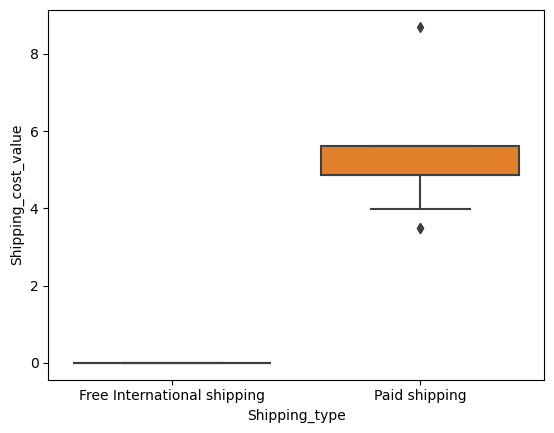

In [87]:
#relationship between Shipping_cost_value and Shipping_type 
sns.boxplot(x='Shipping_type', y='Shipping_cost_value', data=BIbooks)
plt.show()

In [88]:
#find the top 10 Seller_name with the highest Seller_feedback

BIbooks.groupby('Seller_name')['Seller_feedback'].max().nlargest(10)

Seller_name
thrift.books                 3540506
second.sale                  3210382
betterworldbooks             2597925
worldofbooksusa              1069874
wonderbooks                   600517
awesomebooksusa               408362
alibrisbooks                  406750
goodwill_colorado_springs     277966
goodwillexpress               251391
gently.loved.books             97813
Name: Seller_feedback, dtype: int64

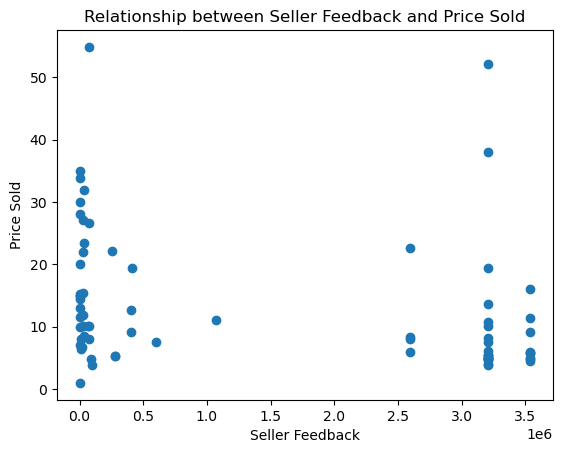

In [89]:
# Create a scatter plot
plt.scatter(BIbooks['Seller_feedback'], BIbooks['Price_sold'])

# Add chart labels
plt.title('Relationship between Seller Feedback and Price Sold')
plt.xlabel('Seller Feedback')
plt.ylabel('Price Sold')

# Display the chart
plt.show()

In [90]:
# top 10 most expensive book by title
top_books = BIbooks.groupby('Title')['Price_sold'].max().nlargest(10)


table = PrettyTable()
table.field_names = ["Title", "Price Sold"]


for Title, price_sold in zip(top_books.index, top_books.values):
    table.add_row([Title, price_sold])


print(table)

+----------------------------------------------------------------------------------+------------+
|                                      Title                                       | Price Sold |
+----------------------------------------------------------------------------------+------------+
|     Business Intelligence, - Paperback, by Sharda Ramesh; Delen - Very Good      |    54.9    |
| Business Intelligence, Analytics, and Data Science: A Managerial Perspect - GOOD |   52.22    |
| Data Mining for Business Intelligence: Concepts, Techniques, and Applicat - GOOD |   38.07    |
|  Business Intelligence, Analytics, and Data Science 4th Edition NEW IN PLASTIC   |   34.99    |
|          Microsoft SharePoint 2010 Business Intelligence by Chuck Rivel          |   33.92    |
| The Definitive Guide to DAX: Business intelligence for Microsoft Power BI, SQL S |   31.99    |
| Successful Business Intelligence: Unlock the Value of Bi & Big Data (Hardback or |    30.0    |
|       Business Int

In [91]:
# save the dataframe to csv
BIbooks.to_csv('/Users/maithilisolanki/Desktop/PORTFOLIO/Python/Ebay_BusinessIntelligenceBooks.csv', index=False)